In [1]:
# Notebooks
import nbimporter
import os
import sys

# Functions from src
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Defined Functions
from utils import *
# from utils import *

# Pandas, matplotlib, pickle, seaborn
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convergence

In [2]:
# current losses are obtained from 2020-07-03/
occutherm_gen_loss = pd.read_csv("tensorboard/paper/run-128-1-20-occuthermT2020-07-03_20 29 23_128-1-20-occutherm_disc_loss-tag-128-1-20-occutherm.csv")
occutherm_disc_loss = pd.read_csv("tensorboard/paper/run-128-1-20-occuthermT2020-07-03_20 29 23_128-1-20-occutherm_gen_loss-tag-128-1-20-occutherm.csv")

occutherm_gen_loss['label'] = "Controlled-G_Loss"
occutherm_disc_loss['label'] = "Controlled-D_Loss"


In [6]:
occutherm_gen_loss.head()

,Wall time,Step,Value,label
0,1.593779e+09,18,9.144258,Controlled-G_Loss
1,1.593779e+09,42,8.816789,Controlled-G_Loss
2,1.593779e+09,45,8.727609,Controlled-G_Loss
3,1.593779e+09,71,7.873995,Controlled-G_Loss
4,1.593779e+09,94,5.691875,Controlled-G_Loss


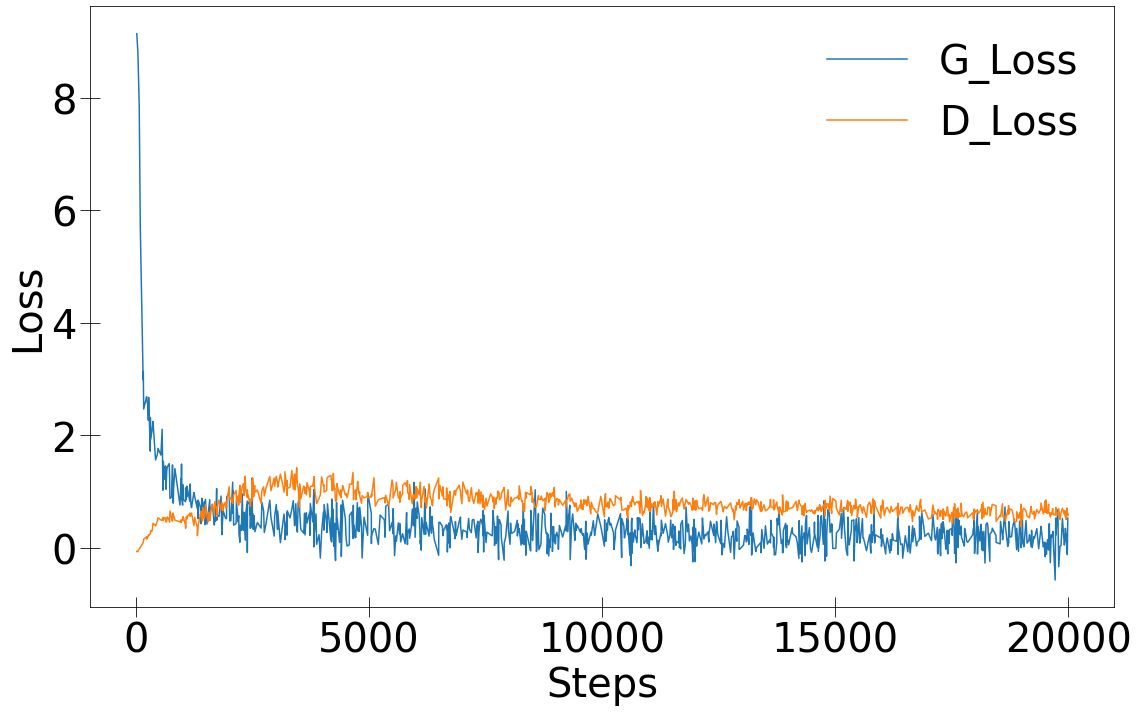

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))

axes.plot(occutherm_gen_loss['Step'], occutherm_gen_loss['Value'], label="G_Loss")
axes.plot(occutherm_disc_loss['Step'], occutherm_disc_loss['Value'], label="D_Loss")

axes.tick_params(length=20, direction="inout", labelsize=40)
axes.set_ylabel('Loss', size=40)
axes.set_xlabel('Steps', size=40)
axes.legend(prop={'size': 40}, frameon=False)

plt.tight_layout()
plt.show()
fig.savefig('images/convergence.png')

# Global variables

In [3]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
palette=sns.color_palette(flatui, 3)

label_tcs = "Discrete Thermal Comfort_TA"
label_cresh = "thermal_cozie"
label_ashrae = "Thermal sensation rounded"

# Label distributions (original)

In [4]:
# load datasets
df_tcs = pd.read_pickle("data/occutherm/df_feature1.pkl") 
df_tcs_train = pd.read_pickle("data/occutherm/df_feature1_train.pkl")

df_cresh = pd.read_pickle("data/cresh/cresh.pkl") 
df_cresh_train = pd.read_pickle("data/cresh/cresh_train.pkl")

df_ashrae = pd.read_pickle("data/ashrae/ashrae.pkl")
df_ashrae_train = pd.read_pickle("data/ashrae/ashrae_train.pkl")


[ 0 -1 -2  1  2]


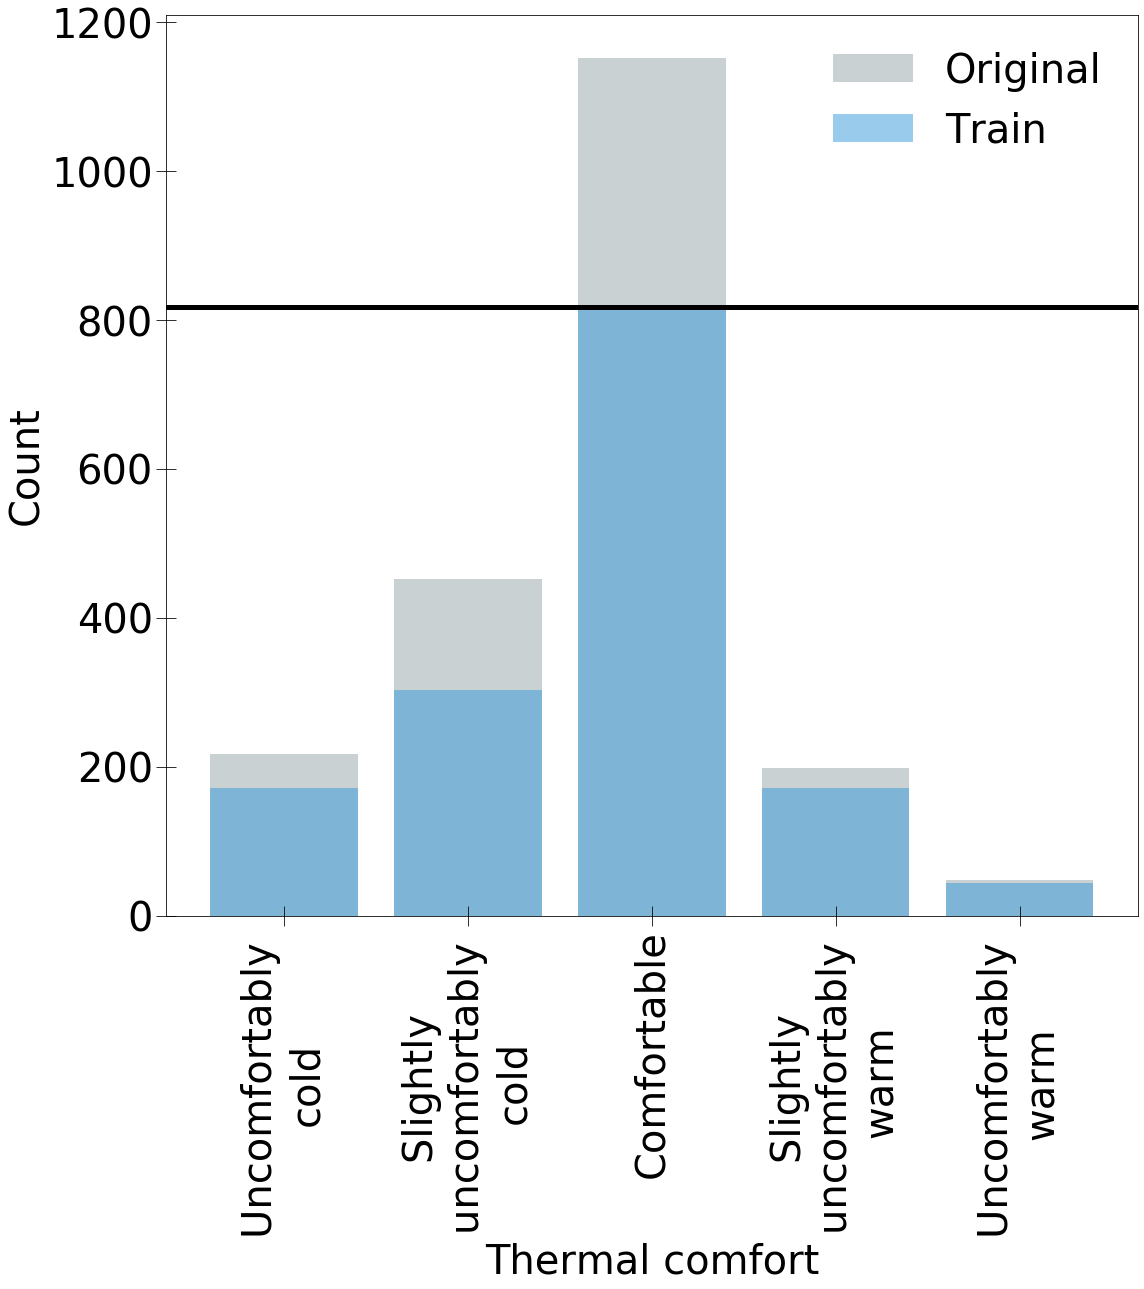

In [5]:
values = df_tcs[label_tcs].value_counts()
indices = values.index.values
print(indices)
values_train = df_tcs_train[label_tcs].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 18))

axes.bar(indices, values, color = palette[2], alpha = 0.5, label="Original")
axes.bar(indices, values_train, color = palette[1], alpha = 0.5, label="Train")

axes.axhline(max(values_train), color='k', linewidth=5)
axes.tick_params(length=20, direction="inout", labelsize=40)
axes.set_ylabel('Count', size=40)
axes.set_xlabel('Thermal comfort', size=40)
axes.legend(prop={'size': 40}, frameon=False)
axes.set_xticklabels(["", "Uncomfortably \ncold",
                      "Slightly \nuncomfortably \ncold",
                      "Comfortable", 
                      "Slightly \nuncomfortably \nwarm", 
                      "Uncomfortably \nwarm",
                      ],
                     rotation=90)

plt.tight_layout()
plt.show()
fig.savefig('images/tcs_dist.png')


[10. 11.  9.]


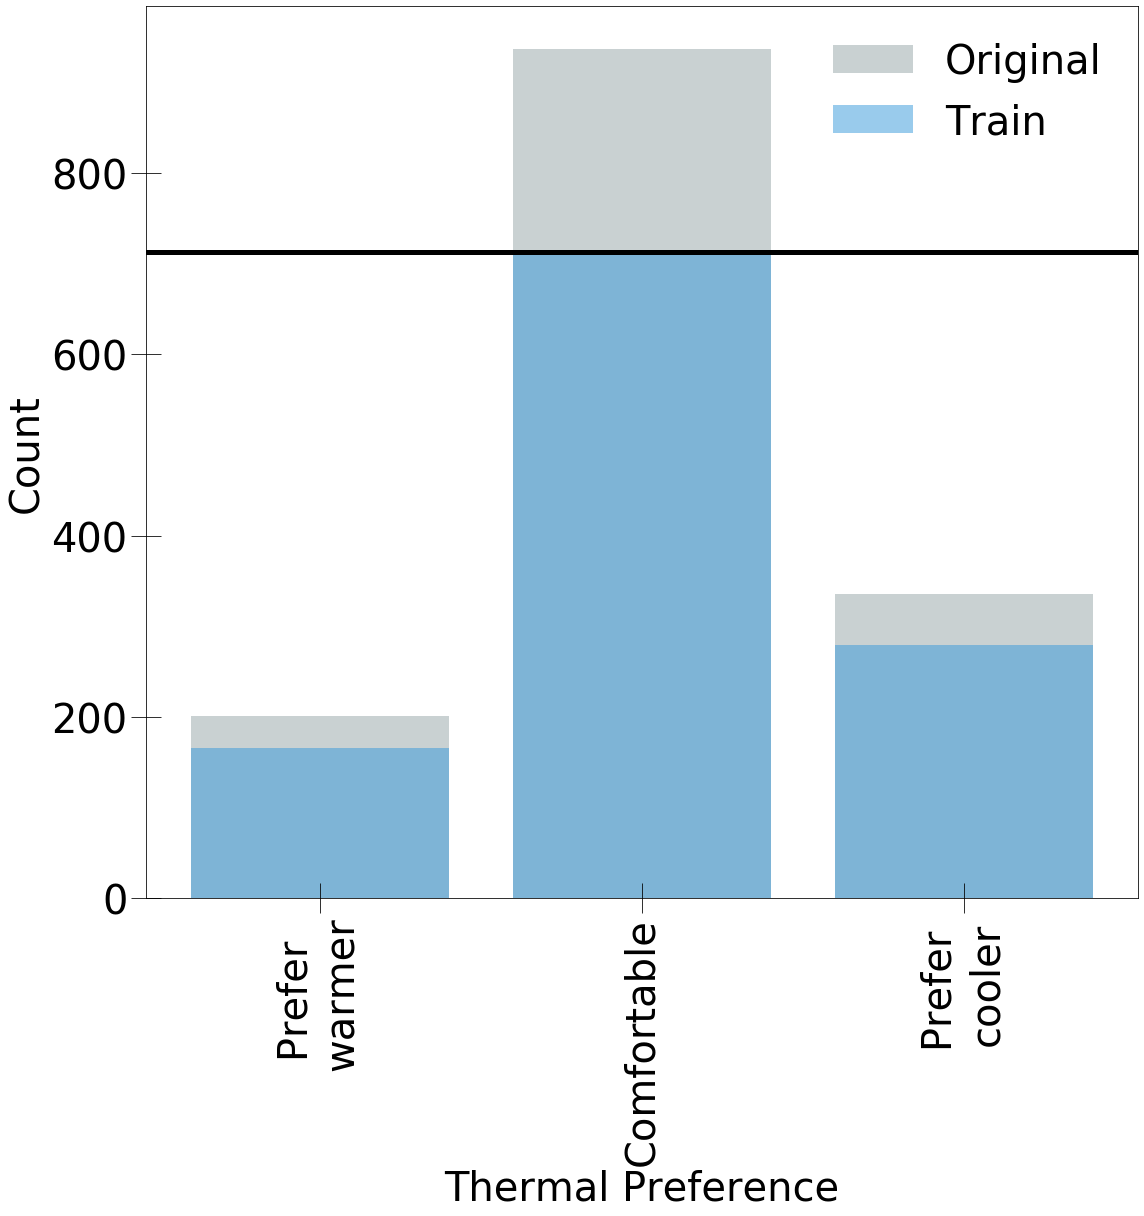

In [6]:
values = df_cresh[label_cresh].value_counts()
indices = values.index.values
print(indices)
indices = [0, 1, -1]
values_train = df_cresh_train[label_cresh].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 17))

axes.bar(indices, values, color = palette[2], alpha = 0.5, label="Original")
axes.bar(indices, values_train, color = palette[1], alpha = 0.5, label="Train")

axes.axhline(max(values_train), color='k', linewidth=5)
axes.tick_params(length=30, direction="inout", labelsize=40)
axes.set_ylabel('Count', size=40)
axes.set_xlabel('Thermal Preference', size=40)
axes.legend(prop={'size': 40}, frameon=False)
axes.set_xticks(indices)
# following the ordering of indices
axes.set_xticklabels(["Comfortable", 
                      "Prefer \ncooler",
                      "Prefer \nwarmer"],
                     rotation=90)

plt.tight_layout()
plt.show()
fig.savefig('images/cresh_dist.png')


[ 0.  1. -1.  2. -2.  3. -3.]


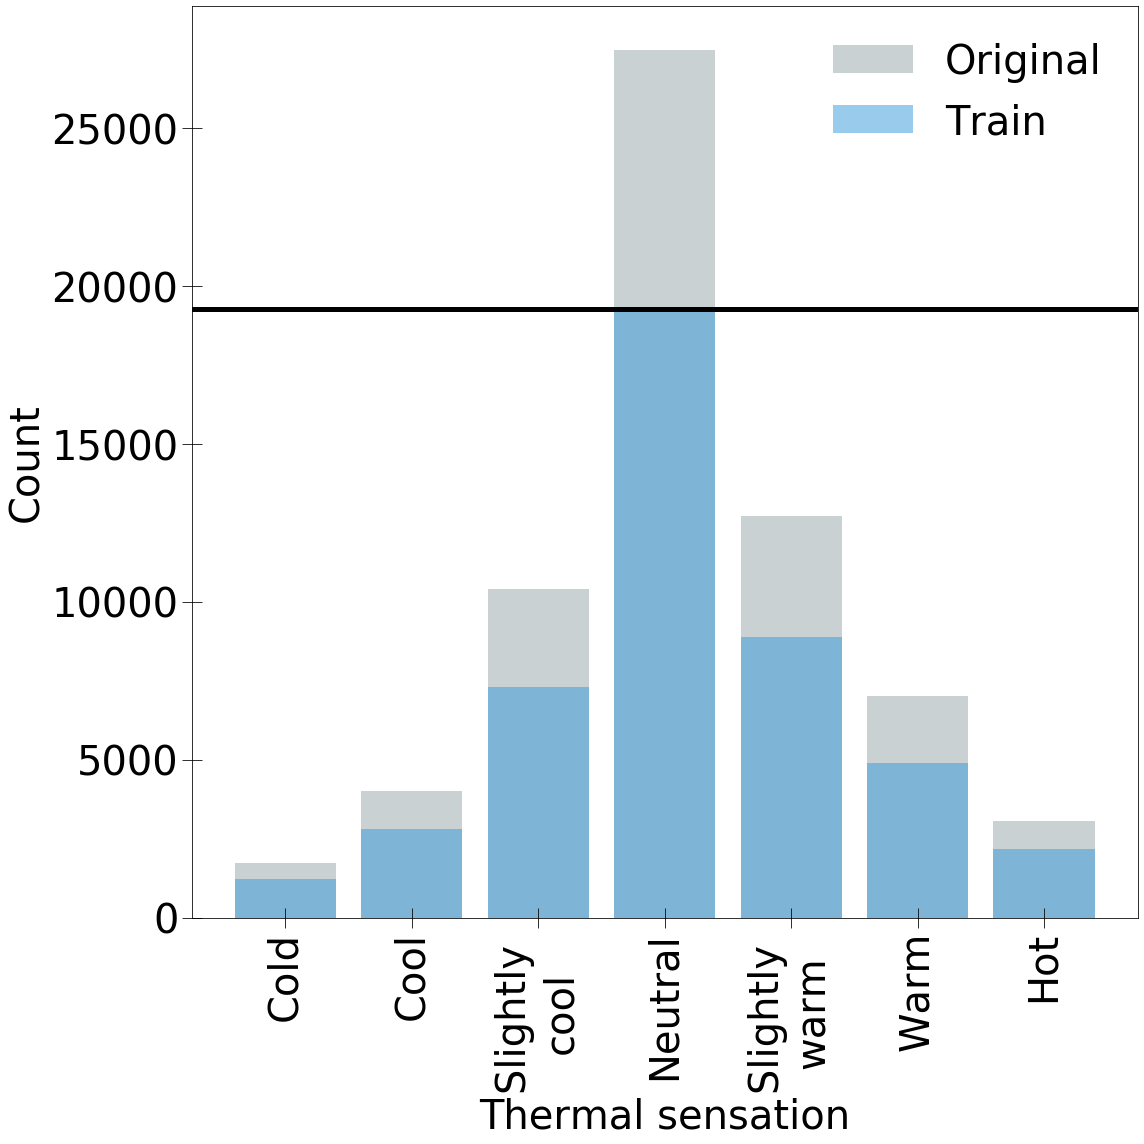

In [7]:
values = df_ashrae[label_ashrae].value_counts()
indices = values.index.values
print(indices)
values_train = df_ashrae_train[label_ashrae].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))

axes.bar(indices, values, color = palette[2], alpha = 0.5, label="Original")
axes.bar(indices, values_train, color = palette[1], alpha = 0.5, label="Train")

axes.axhline(max(values_train), color='k', linewidth=5)
axes.tick_params(length=20, direction="inout", labelsize=40)
axes.set_ylabel('Count', size=40)
axes.set_xlabel('Thermal sensation', size=40)
axes.legend(prop={'size': 40}, frameon=False)

# following the ordering of indices
axes.set_xticklabels(["Neutral",
                      "Slightly \nwarm",
                      "Slightly \ncool",
                      "Warm",
                      "Cool",
                      "Hot",
                      "Cold"],
                     rotation=90)
axes.set_xticks(indices)

plt.tight_layout()
plt.show()
fig.savefig('images/ashrae_dist.png')


[ 0 -1 -2  1  2]
[10. 11.  9.]
[ 0.  1. -1.  2. -2.  3. -3.]


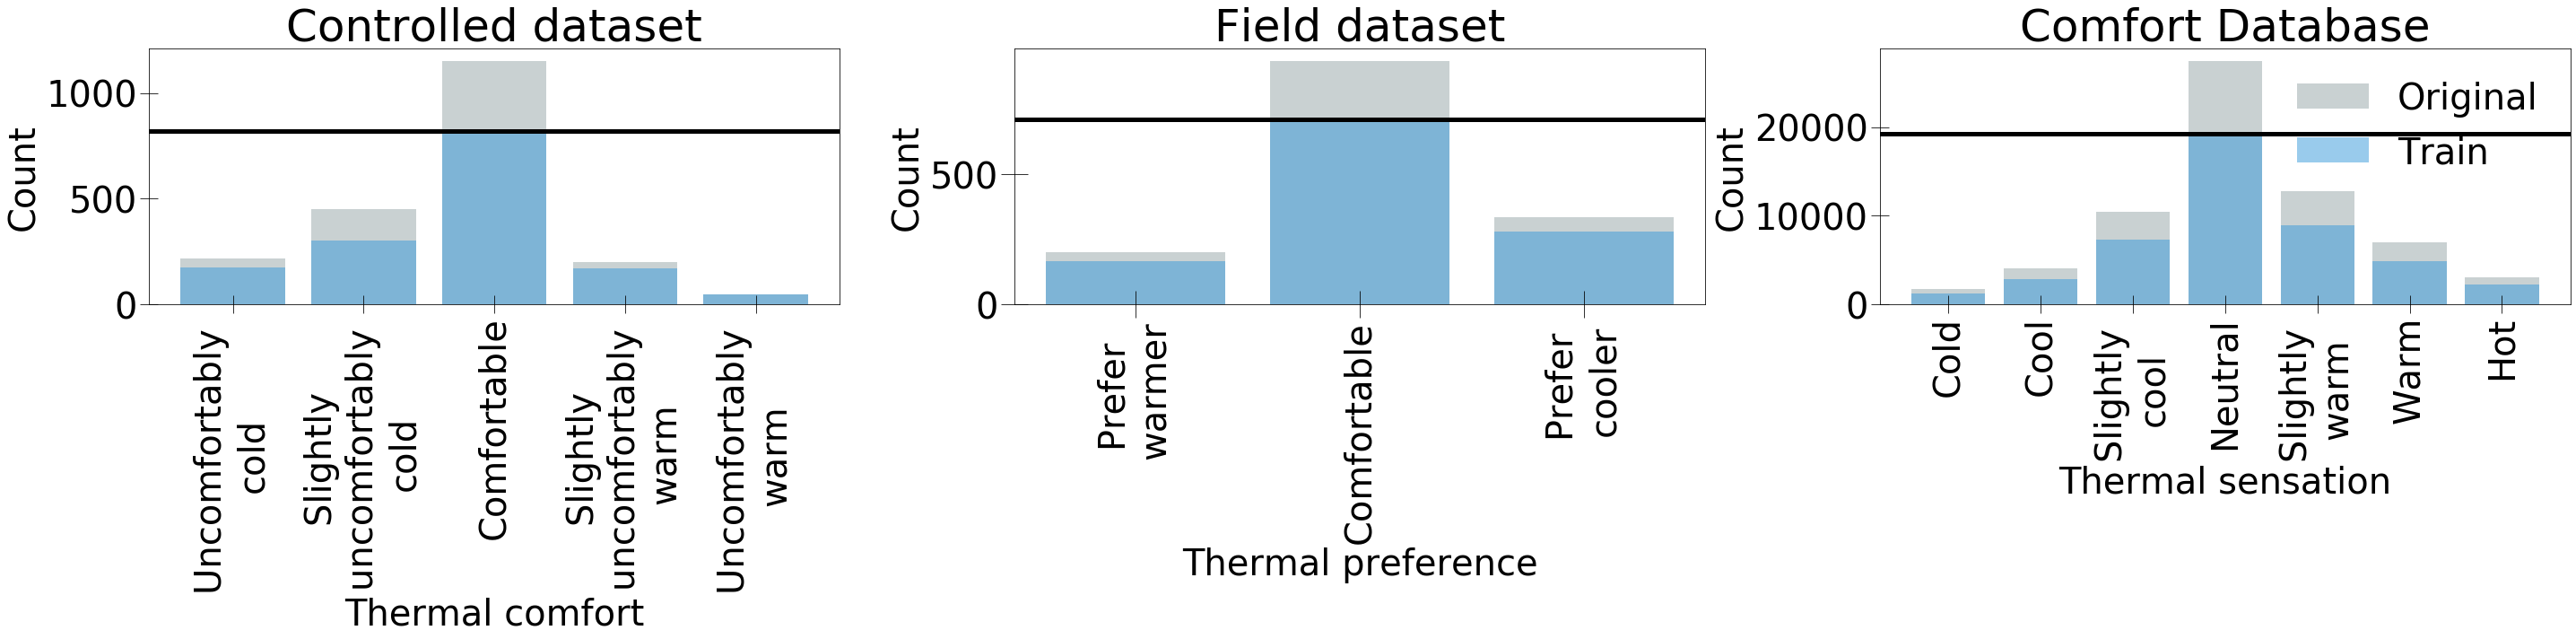

In [16]:
# one single figure

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))


#######################################################################################
# occutherm
values_occutherm = df_tcs[label_tcs].value_counts()
indices_occutherm = values_occutherm.index.values
print(indices_occutherm)
values_train_occutherm = df_tcs_train[label_tcs].value_counts()

axes[0].bar(indices_occutherm, values_occutherm, color = palette[2], alpha = 0.5, label="Original")
axes[0].bar(indices_occutherm, values_train_occutherm, color = palette[1], alpha = 0.5, label="Train")

axes[0].axhline(max(values_train_occutherm), color='k', linewidth=5)
axes[0].tick_params(length=20, direction="inout", labelsize=40)
axes[0].set_ylabel('Count', size=40)
axes[0].set_xlabel('Thermal comfort', size=40)
# axes[0].legend(prop={'size': 40}, frameon=False)
# [ 0 -1 -2  1  2]
axes[0].set_title("Controlled dataset", size=50)
axes[0].set_xticks(indices_occutherm)
axes[0].set_xticklabels(["Comfortable", 
                         "Slightly \nuncomfortably \ncold",
                         "Uncomfortably \ncold",
                         "Slightly \nuncomfortably \nwarm", 
                         "Uncomfortably \nwarm",
                         ],
                         rotation=90)

#######################################################################################
# cresh
values_cresh = df_cresh[label_cresh].value_counts()
indices_cresh = values_cresh.index.values
print(indices_cresh)
indices_cresh = [0, 1, -1]
values_train_cresh = df_cresh_train[label_cresh].value_counts()

axes[1].bar(indices_cresh, values_cresh, color = palette[2], alpha = 0.5, label="Original")
axes[1].bar(indices_cresh, values_train_cresh, color = palette[1], alpha = 0.5, label="Train")

axes[1].axhline(max(values_train_cresh), color='k', linewidth=5)
axes[1].tick_params(length=30, direction="inout", labelsize=40)
axes[1].set_ylabel('Count', size=40)
axes[1].set_xlabel('Thermal preference', size=40)
# axes[1].legend(prop={'size': 40}, frameon=False)
axes[1].set_title("Field dataset", size=50)
axes[1].set_xticks(indices_cresh)
# following the ordering of indices
axes[1].set_xticklabels(["Comfortable", 
                      "Prefer \ncooler",
                      "Prefer \nwarmer"],
                     rotation=90)

#######################################################################################
# ashrae

values_ashrae = df_ashrae[label_ashrae].value_counts()
indices_ashrae = values_ashrae.index.values
print(indices_ashrae)
values_train_ashrae = df_ashrae_train[label_ashrae].value_counts()

axes[2].bar(indices_ashrae, values_ashrae, color = palette[2], alpha = 0.5, label="Original")
axes[2].bar(indices_ashrae, values_train_ashrae, color = palette[1], alpha = 0.5, label="Train")

axes[2].axhline(max(values_train_ashrae), color='k', linewidth=5)
axes[2].tick_params(length=20, direction="inout", labelsize=40)
axes[2].set_ylabel('Count', size=40)
axes[2].set_xlabel('Thermal sensation', size=40)
axes[2].legend(prop={'size': 40}, frameon=False)

# following the ordering of indices
axes[2].set_title("Comfort Database", size=50)
axes[2].set_xticks(indices_ashrae)
axes[2].set_xticklabels(["Neutral",
                      "Slightly \nwarm",
                      "Slightly \ncool",
                      "Warm",
                      "Cool",
                      "Hot",
                      "Cold"],
                     rotation=90)
plt.tight_layout()
plt.show()
fig.savefig('images/all_dist.png')


# Label distributions (reduced)

In [11]:
def remap_occutherm(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

def remap_ashrae(x):
    if x > 0.0:
        return 1.0
    elif x < 0.0:
        return -1.0
    else:
        return 0.0


In [12]:
# load datasets
df_tcs_reduced = pd.read_pickle("data/occutherm/df_feature1.pkl") 
df_tcs_reduced['Discrete Thermal Comfort_TA'] = df_tcs_reduced['Discrete Thermal Comfort_TA'].apply(remap_occutherm)
df_tcs_train_reduced = pd.read_pickle("data/occutherm/df_feature1_train_reduced.pkl")

df_cresh = pd.read_pickle("data/cresh/cresh.pkl") 
df_cresh_train = pd.read_pickle("data/cresh/cresh_train.pkl")

df_ashrae_reduced = pd.read_pickle("data/ashrae/ashrae.pkl")
df_ashrae_reduced['Thermal sensation rounded'] = df_ashrae_reduced['Thermal sensation rounded'].apply(remap_ashrae)
df_ashrae_train_reduced = pd.read_pickle("data/ashrae/ashrae_train_reduced.pkl")

label_tcs = "Discrete Thermal Comfort_TA"
label_cresh = "thermal_cozie"
label_ashrae = "Thermal sensation rounded"

[ 0 -1  1]
[10. 11.  9.]
[ 0.  1. -1.]


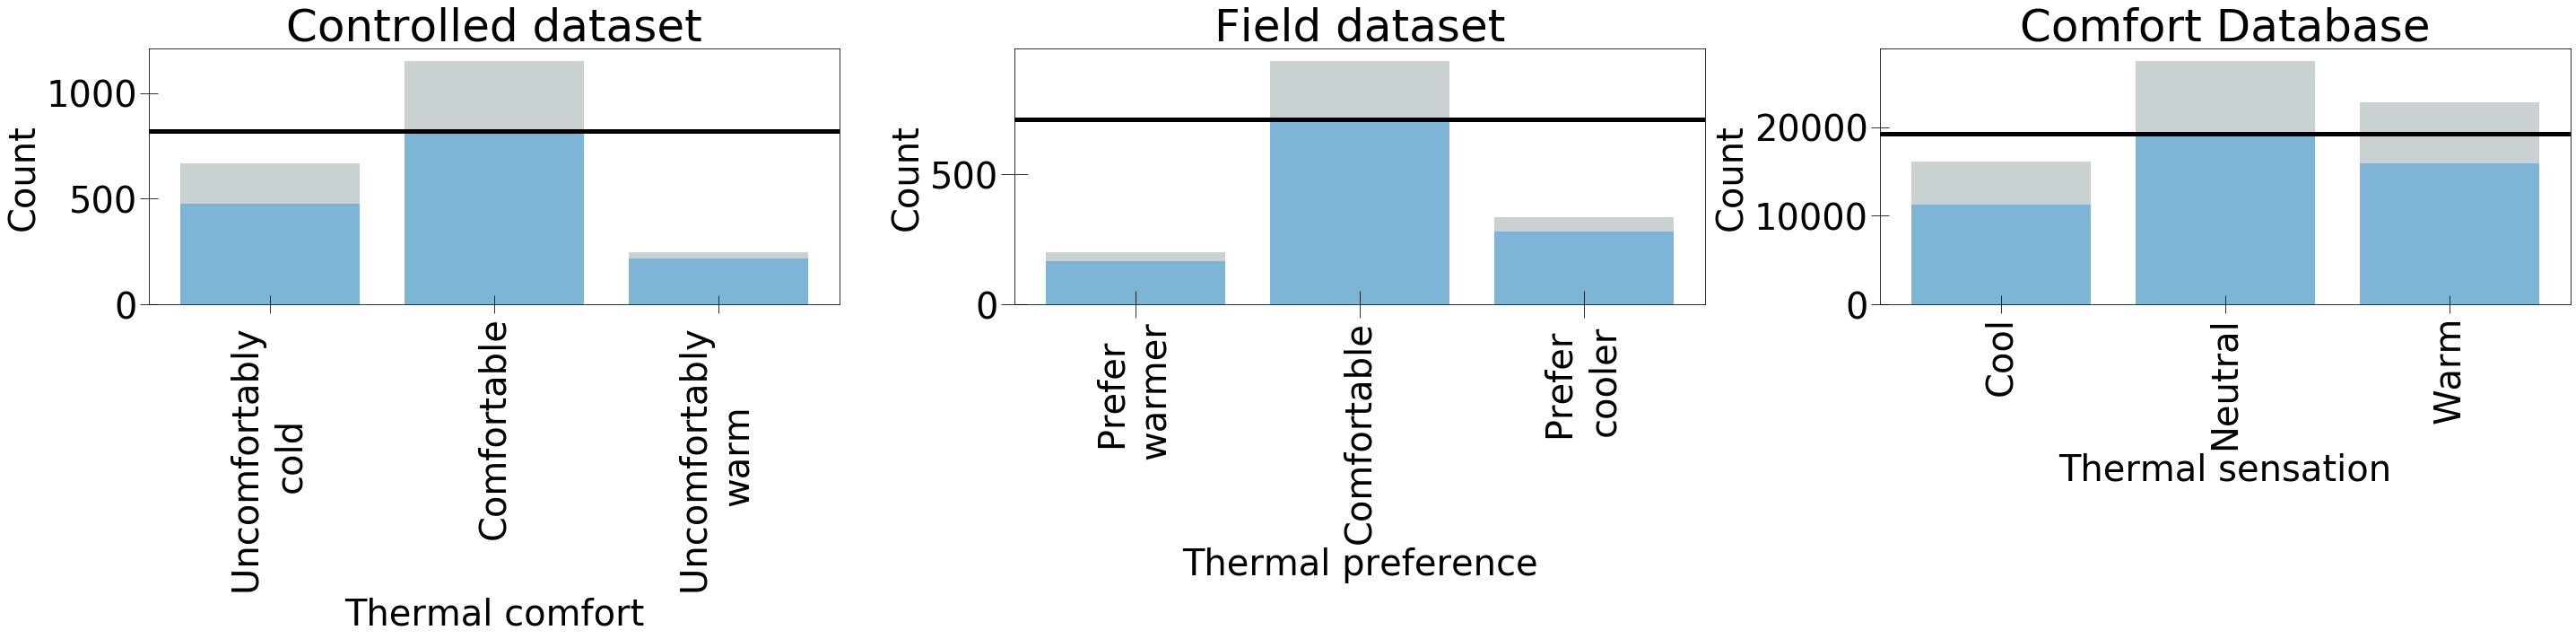

In [17]:
# one single figure

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))


#######################################################################################
# occutherm
values_occutherm = df_tcs_reduced[label_tcs].value_counts()
indices_occutherm = values_occutherm.index.values
print(indices_occutherm)
values_train_occutherm = df_tcs_train_reduced[label_tcs].value_counts()

axes[0].bar(indices_occutherm, values_occutherm, color = palette[2], alpha = 0.5, label="Original")
axes[0].bar(indices_occutherm, values_train_occutherm, color = palette[1], alpha = 0.5, label="Train")

axes[0].axhline(max(values_train_occutherm), color='k', linewidth=5)
axes[0].tick_params(length=20, direction="inout", labelsize=40)
axes[0].set_ylabel('Count', size=40)
axes[0].set_xlabel('Thermal comfort', size=40)
# axes[0].legend(prop={'size': 40}, frameon=False)
# [ 0 -1  1]
axes[0].set_title("Controlled dataset", size=50)
axes[0].set_xticks(indices_occutherm)
axes[0].set_xticklabels(["Comfortable", 
                         "Uncomfortably \ncold",
                         "Uncomfortably \nwarm",
                         ],
                         rotation=90)

#######################################################################################
# cresh
values_cresh = df_cresh[label_cresh].value_counts()
indices_cresh = values_cresh.index.values
print(indices_cresh)
indices_cresh = [0, 1, -1]
values_train_cresh = df_cresh_train[label_cresh].value_counts()

axes[1].bar(indices_cresh, values_cresh, color = palette[2], alpha = 0.5, label="Original")
axes[1].bar(indices_cresh, values_train_cresh, color = palette[1], alpha = 0.5, label="Train")

axes[1].axhline(max(values_train_cresh), color='k', linewidth=5)
axes[1].tick_params(length=30, direction="inout", labelsize=40)
axes[1].set_ylabel('Count', size=40)
axes[1].set_xlabel('Thermal preference', size=40)
# axes[1].legend(prop={'size': 40}, frameon=False)
axes[1].set_title("Field dataset", size=50)
axes[1].set_xticks(indices_cresh)
# following the ordering of indices
# [10. 11.  9.]
axes[1].set_xticklabels(["Comfortable", 
                      "Prefer \ncooler",
                      "Prefer \nwarmer"],
                     rotation=90)

#######################################################################################
# ashrae

values_ashrae = df_ashrae_reduced[label_ashrae].value_counts()
indices_ashrae = values_ashrae.index.values
print(indices_ashrae)
values_train_ashrae = df_ashrae_train_reduced[label_ashrae].value_counts()

axes[2].bar(indices_ashrae, values_ashrae, color = palette[2], alpha = 0.5, label="Original")
axes[2].bar(indices_ashrae, values_train_ashrae, color = palette[1], alpha = 0.5, label="Train")

axes[2].axhline(max(values_train_ashrae), color='k', linewidth=5)
axes[2].tick_params(length=20, direction="inout", labelsize=40)
axes[2].set_ylabel('Count', size=40)
axes[2].set_xlabel('Thermal sensation', size=40)
# axes[2].legend(prop={'size': 40}, frameon=False, loc='upper right')

# following the ordering of indices
axes[2].set_title("Comfort Database", size=50)
axes[2].set_xticks(indices_ashrae)
# [ 0.  1. -1.]
axes[2].set_xticklabels(["Neutral",
                         "Warm",
                         "Cool"],
                     rotation=90)
plt.tight_layout()
plt.show()
fig.savefig('images/all_dist_reduced.png')


# Accuracy Comparison

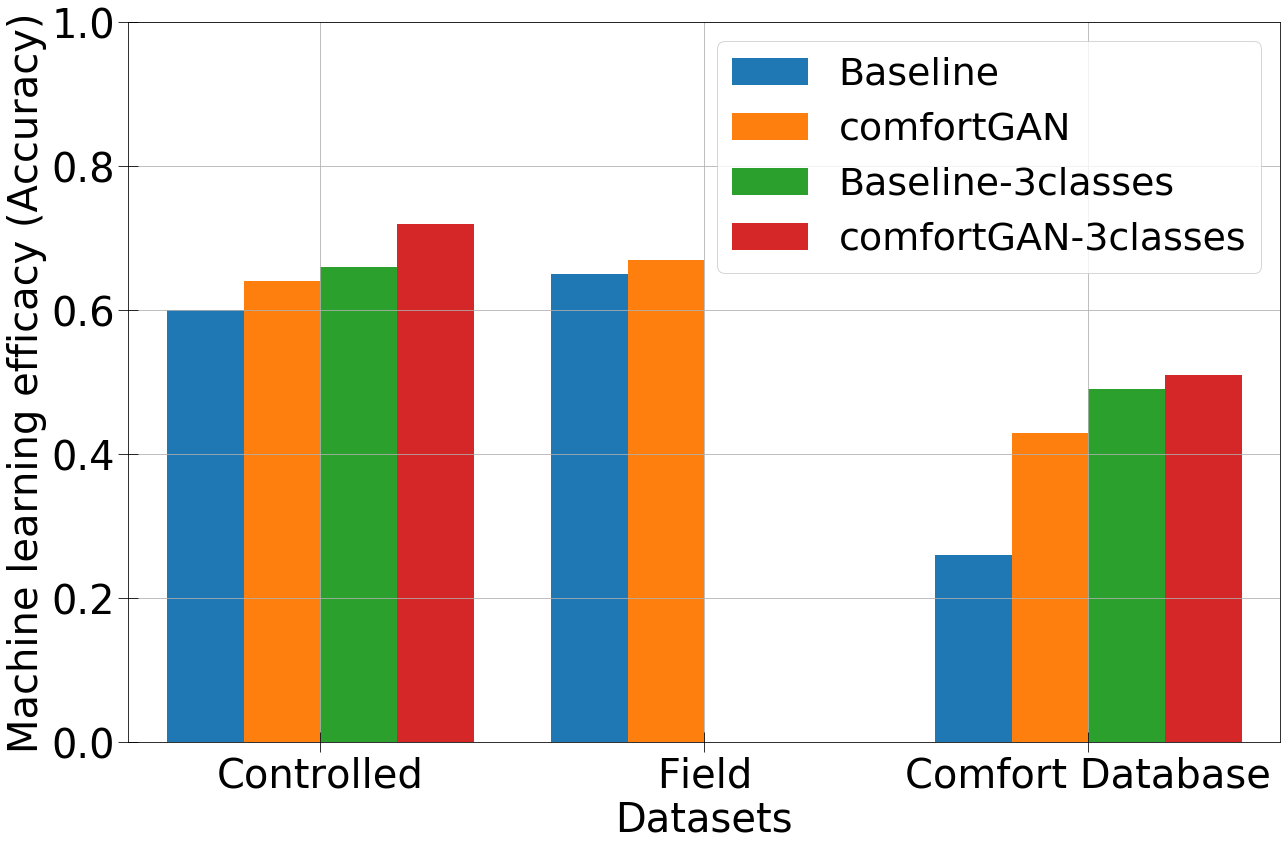

In [31]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_axes([0,0,1,1])
models = ['Baseline', 'comfortGAN', 'Baseline-3classes', 'comfortGAN-3classes'] # the label locations
datasets = ['Controlled', 'Field', 'Comfort Database']
pos = np.arange(len(datasets))
width = 0.2  # the width of the bars

# values are in the same order as the list models
baselines = [0.6, 0.65, 0.26]
accuracies = [0.64, 0.67, 0.43]
baselines_3classes = [0.66, 0, 0.49]
accuracies_3classes = [0.72, 0, 0.51]

ax.bar(pos, baselines, width, label=models[0])
ax.bar(pos + width, accuracies, width, label=models[1])
ax.bar(pos + width*2, baselines_3classes, width, label=models[2])
ax.bar(pos + width*3, accuracies_3classes, width, label=models[3])

# for field that only has 2 bars
# ax.bar(x + width, [0.65], width) #, label=models[0])
# ax.bar(x + width*2, [0.67], width) #, label=models[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set(ylim=(0, 1))
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(datasets)

ax.tick_params(length=20, direction="inout", labelsize=40)
ax.set_ylabel('Machine learning efficacy (Accuracy)', size=40)
ax.set_xlabel('Datasets', size=40)
ax.legend(prop={'size': 38})

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.grid()
# plt.tight_layout()
plt.show()
fig.savefig('images/accuracies_comparison.png', bbox_inches='tight')
